In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter
from string import punctuation

In [2]:
movies = pd.read_csv('movieCorpus.csv')
movies.drop(columns=['Unnamed: 0'], inplace=True)
movies

,movie_name,genre,original_language,popularity,release_date,vote_average,revenue,runtime,author,score,link_id,utc_datetime,body,Annotator1_Subjective,Annotator1_Polarity,Annotator2_Subjective,Annotator2_Polarity,Test,Auto_labeller_eval_subj,Auto_labeller_eval_pol
0,The Wolf of Snow Hollow,"Horror, Thriller",en,61.224,10/23/2020,6.1,239828,84,languinomaedtro,1.0,t3_vcginw,2022-06-15T00:00:00Z,The Wolf of snow hollow,None,None,None,None,0,OBJECTIVE,None
1,Borat Subsequent Moviefilm,Comedy,en,26.738,10/23/2020,6.5,0,96,extremelyhonesthou,1.0,t3_mykx8t,2021-04-26T00:00:00Z,What are we? Some kind of Borat Subsequent Mov...,None,None,None,None,0,OBJECTIVE,None
2,Level One,Adventure,en,17.256,1/20/2021,6.3,0,23,throwaway112112312,8.0,t3_hszwbj,2020-07-18T00:00:00Z,I love Yojimbo but Harakiri is on another leve...,None,None,None,None,0,OBJECTIVE,None
3,Gretel & Hansel,"Horror, Fantasy, Thriller",en,22.828,1/30/2020,6.1,22059211,87,mmmyesplease---,19.0,t3_yg0oab,2022-10-29T00:00:00Z,They were just treasures we found at libraries...,None,None,None,None,0,OBJECTIVE,None
4,47 Meters Down: Uncaged,"Horror, Drama, Adventure",en,16.081,8/15/2019,5.7,0,90,had0ukenn,1.0,t3_pehuql,2021-08-30T00:00:00Z,This is directed by Johannes Roberts who direc...,None,None,None,None,0,OBJECTIVE,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21649,The Beta Test,"Comedy, Mystery, Thriller, Horror",en,30.294,10/15/2021,5.8,0,93,SpecialistTax6798,1.0,t3_xla7w0,2022-09-22T00:00:00Z,Recently I quite enjoyed The Beta Test.,SUBJECTIVE,POSITIVE,OBJECTIVE,None,1,OBJECTIVE,None
21650,Promising Young Woman,"Thriller, Crime, Drama",en,36.116,12/13/2020,7.6,13868965,114,Naweezy,1.0,t3_10k68y9,2023-01-24T00:00:00Z,Carey Mulligan shouldve have won that yr for P...,SUBJECTIVE,POSITIVE,OBJECTIVE,None,1,OBJECTIVE,None
21651,The Green Knight,"Adventure, Drama, Fantasy",en,197.458,7/29/2021,6.7,18192220,130,Naweezy,1.0,t3_104tjjk,2023-01-06T00:00:00Z,His wife Alicia Vikander should be in more mov...,SUBJECTIVE,NEUTRAL,OBJECTIVE,None,1,OBJECTIVE,None
21652,Those Who Wish Me Dead,Thriller,en,130.330,2021-05-05T00:00:00Z,7.0,23384502,100,thejugglar,0.0,t3_vm8u6d,2022-06-28T00:00:00Z,"He played an ex military hit man in ""Those who...",SUBJECTIVE,NEUTRAL,OBJECTIVE,None,1,OBJECTIVE,None


In [3]:
# remove punctuation from the text column
movies['body'] = movies['body'].apply(lambda x: ''.join([c for c in x if c not in punctuation]))

# tokenize the words in the text column
words = [word_tokenize(text.lower()) for text in movies['body']]

# count the number of records, words, and types
num_records = len(words)
num_words = len([word for sentence in words for word in sentence])
num_types = len(set([word for sentence in words for word in sentence]))

print("Number of records: ", num_records)
print("Number of words: ", num_words)
print("Number of types: ", num_types)

Number of records:  21654
Number of words:  938835
Number of types:  33702


In [4]:
# tokenize the words
words = [word for text in movies['body'] for word in nltk.word_tokenize(text.lower()) if word.isalpha()]

# count the frequency of each word
word_freq = dict(Counter(words))
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# sort the words by frequency in descending order
sorted_words = sorted(word_freq, key=word_freq.get, reverse=True)

# get the frequency of each word
freq = [word_freq[word] for word in sorted_words]

In [5]:
sorted_freq

[('the', 52270),
 ('and', 24272),
 ('a', 23805),
 ('of', 20315),
 ('to', 19016),
 ('i', 18899),
 ('in', 15075),
 ('it', 14557),
 ('was', 12323),
 ('that', 12167),
 ('is', 11897),
 ('but', 8840),
 ('for', 7436),
 ('movie', 7317),
 ('with', 6437),
 ('you', 5566),
 ('on', 5538),
 ('like', 5439),
 ('he', 5431),
 ('its', 5327),
 ('as', 5315),
 ('this', 5195),
 ('not', 4863),
 ('just', 4822),
 ('they', 4655),
 ('be', 4449),
 ('have', 4186),
 ('so', 4108),
 ('are', 3904),
 ('his', 3825),
 ('one', 3777),
 ('all', 3513),
 ('my', 3437),
 ('good', 3286),
 ('out', 3258),
 ('at', 3235),
 ('me', 3225),
 ('or', 3211),
 ('about', 3123),
 ('from', 3040),
 ('if', 3012),
 ('movies', 3002),
 ('really', 2822),
 ('an', 2787),
 ('more', 2514),
 ('think', 2499),
 ('what', 2488),
 ('film', 2373),
 ('up', 2322),
 ('had', 2302),
 ('also', 2266),
 ('would', 2226),
 ('when', 2225),
 ('dont', 2193),
 ('has', 2184),
 ('by', 2163),
 ('were', 2119),
 ('him', 2074),
 ('great', 2071),
 ('some', 2057),
 ('because', 2039)

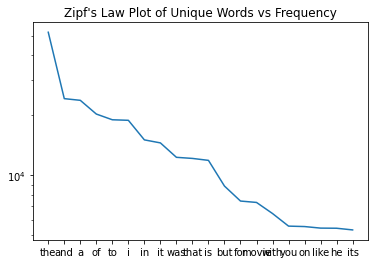

In [6]:
plt.plot(sorted_words[:20], freq[:20])
plt.yscale('log')
plt.title('Zipf\'s Law Plot of Unique Words vs Frequency')
plt.show()

In [7]:
train_df = movies[movies["Test"] == 0]
test_df = movies[movies["Test"] == 1]

print("PROPORTION OF DATA:", len(train_df)/(len(train_df) + len(test_df))*100)

PROPORTION OF DATA: 90.00184723376744


Text(0.5, 1.0, 'Overall Polarity Distribution')

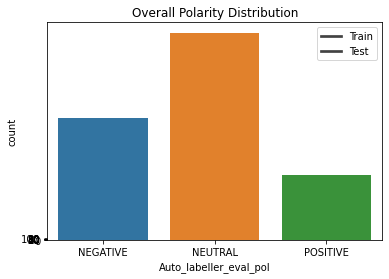

In [8]:
# plot overall train test distribution
ax = sns.barplot(x="Test", y="Test", data=movies, estimator=lambda x: len(x) / len(movies) * 100)
ax.set(ylabel="Percent")
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.legend(["Train", "Test"])
plt.title("Overall Train Test Distribution")

#plot subjectivity distribution
sns.countplot(x="Auto_labeller_eval_subj", data=movies)
plt.title("Overall Subjectivity Distribution")

#plot polarity distribution
df_pol = movies[movies["Auto_labeller_eval_pol"] != "None"] #get only comments that have polarity
sns.countplot(x=df_pol["Auto_labeller_eval_pol"], data=movies)
plt.title("Overall Polarity Distribution")